In [1]:
import pandas as pd
movie_reviews = pd.read_csv("train.csv")
movie_reviews.isnull().values.any()
movie_reviews.shape


(156060, 2)

In [2]:
movie_reviews.head()

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2


In [3]:
movie_reviews.drop_duplicates(inplace=True)

In [4]:
movie_reviews.shape

(155838, 2)

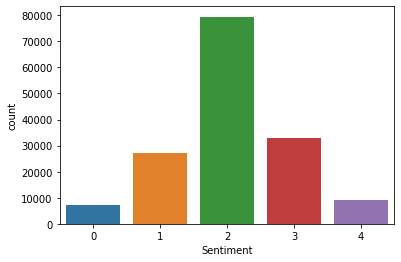

In [5]:
import seaborn as sns

sns.countplot(x='Sentiment', data=movie_reviews)

In [6]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from keras.layers import LeakyReLU

Using TensorFlow backend.


In [7]:
#pre_treatment

In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dark1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
import re

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [10]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

stemmer=nltk.stem.WordNetLemmatizer()
def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
   
    remove_tags(text)  
    # text = re.sub('[^a-zA-Z]', ' ', text)# Remove punctuations and numbers
    # text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)# Single character removal
    # text = re.sub(r'\s+', ' ', text)# Removing multiple spaces
    text = text.lower()# lowercase text  
    text = re.sub(REPLACE_BY_SPACE_RE,' ',text)# replace REPLACE_BY_SPACE_RE symbols by space in text    
    text = re.sub(BAD_SYMBOLS_RE,' ',text)# delete symbols which are in BAD_SYMBOLS_RE from text
    
    text = ' '.join(s for s in text.split() if s not in STOPWORDS)# delete stopwords from text  
    text = ' '.join(stemmer.lemmatize(token) for token in text.split())
    text = ''.join([i for i in text if not i.isdigit()])#delete numbers
    return text

In [11]:
X = []
sentences = list(movie_reviews['Phrase'])
for sen in sentences:
    X.append(text_prepare(sen))

In [12]:
X[8]

'escapade'

In [13]:
import numpy as np

Y=movie_reviews['Sentiment']
Y = np.array(Y)
Y=np.array(list(Y))

In [14]:
data = dict(zip(X, Y))

In [51]:
len(data)

82442

In [15]:
X= list(data.keys())
Y= array(list(data.values()))

In [16]:
print(Y)

[1 2 2 ... 3 2 2]


In [ ]:
#spliting data

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [28]:
from collections import defaultdict

words_counts = defaultdict(int)
for text in X_train:
    for word in text.split():
        words_counts[word] += 1

In [ ]:
#function for bag of words

In [31]:
DICT_SIZE = 9632
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:DICT_SIZE]
WORDS_TO_INDEX = {p[0]:i for i,p in enumerate(most_common_words[:DICT_SIZE])}
def my_bag_of_words(text, words_to_index, dict_size):
    """
        text: a string
        dict_size: size of the dictionary
        
        return a vector which is a bag-of-words representation of 'text'
    """
    result_vector = np.zeros(dict_size)
    for word in text.split():
        if word in words_to_index:
            result_vector[words_to_index[word]] += 1
    return result_vector


In [32]:
#print(most_common_words)

In [33]:
from scipy import sparse as sp_sparse
X_train_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_train])


X_test_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_test])


In [34]:
print('X_train shape ', X_train_mybag.shape)
print('X_test shape ', X_test_mybag.shape)

X_train shape  (65953, 9632)
X_test shape  (16489, 9632)


In [ ]:
#tfidf

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
def tfidf_features(X_train, X_test):
 
    
    
    tfidf_vectorizer = TfidfVectorizer(min_df=10,max_df=0.80,ngram_range=(1,2))
    X_train = tfidf_vectorizer.fit_transform(X_train)   
    X_test = tfidf_vectorizer.transform(X_test)
    return X_train,X_test, tfidf_vectorizer.vocabulary_

In [37]:
X_train_tfidf,X_test_tfidf, tfidf_vocab = tfidf_features(X_train, X_test)
tfidf_reversed_vocab = {i:word for word,i in tfidf_vocab.items()}

In [ ]:
#word embedding 

In [ ]:
#tokenization and turning words to sequences

In [38]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train_tk = tokenizer.texts_to_sequences(X_train)
X_test_tk = tokenizer.texts_to_sequences(X_test)

In [39]:
print(X_train[3]) 

welcome collinwood


In [40]:
X_train_tk[3]

[570, 6549]

In [ ]:
#padding

In [41]:
maxlen=20
X_train_tk = pad_sequences(X_train_tk, padding='post', maxlen=maxlen)
X_test_tk = pad_sequences(X_test_tk, padding='post', maxlen=maxlen)

In [42]:
X_train_tk[3]

array([ 570, 6549,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0])

In [ ]:
#importing the glove file

In [43]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
#creating the embedding matrix

In [44]:
vocab_size = len(tokenizer.word_index)+1

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
#creating one hot vector

In [45]:
from keras.utils import to_categorical
Y_train_oh = to_categorical(Y_train)
Y_test_oh= to_categorical(Y_test)
print(Y_train_oh[3])

[0. 0. 1. 0. 0.]


In [46]:
print( len(embedding_matrix))
print(len(embedding_matrix[0]))

13612
100


In [ ]:
#class weight to balence the data

In [47]:
class_weight = {0: 8.,
                1: 3.,
                2: 1.,
                3: 3.,
                4: 8.}

In [ ]:
#machine learning

In [52]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#logistc regression + bag of words

In [53]:
model = LogisticRegression()
model.fit(X_train_mybag,Y_train)

Y_pred_mybag=model.predict(X_test_mybag)



C:\Users\dark1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dark1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [54]:
from sklearn import metrics

In [55]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_mybag)
cnf_matrix

array([[ 143,  333,  274,   28,    1],
       [ 110,  920, 1741,  147,   18],
       [  43,  450, 7212,  459,   26],
       [   7,   99, 1959, 1328,  177],
       [   1,   20,  220,  495,  278]], dtype=int64)

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred_mybag)

0.6272907855952838

In [ ]:
#logistc regression + tfidf

In [82]:
model.fit(X_train_tfidf,Y_train)

Y_pred_tfidf=model.predict(X_test_tfidf)



In [83]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_tfidf)
cnf_matrix

array([[  223,   709,   438,    45,     1],
       [  102,  1774,  3396,   245,    10],
       [   25,   662, 14021,   894,    37],
       [    4,   129,  3400,  2974,   200],
       [    0,    23,   367,  1134,   399]], dtype=int64)

In [84]:
accuracy_score(Y_test, Y_pred_tfidf)

0.6212674612328591

In [ ]:
#logistc regression + word embedding

In [85]:
model.fit(X_train_tk,Y_train)

Y_pred_tfidf=model.predict(X_test_tk)



C:\Users\dark1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\dark1\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [86]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_tfidf)
cnf_matrix

array([[    8,   102,  1249,    54,     3],
       [   13,   269,  5071,   166,     8],
       [    9,   243, 15214,   171,     2],
       [   15,   260,  6240,   187,     5],
       [    6,   111,  1737,    64,     5]], dtype=int64)

In [87]:
accuracy_score(Y_test, Y_pred_tfidf)

0.5024669998718442

In [ ]:
#svc + bag of words

In [88]:
from sklearn.svm import SVC

In [89]:
model = SVC(C=100)
model.fit(X_train_mybag,Y_train)

Y_pred_mybag=model.predict(X_test_mybag)


C:\Users\dark1\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [90]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_mybag)
cnf_matrix

array([[   13,   439,   920,    44,     0],
       [    5,   745,  4570,   207,     0],
       [    4,   306, 14853,   474,     2],
       [    2,   135,  4847,  1715,     8],
       [    0,    24,   919,   934,    46]], dtype=int64)

In [91]:
accuracy_score(Y_test, Y_pred_mybag)

0.5565808022555427

In [ ]:
#svc + tfidf

In [92]:
model = SVC(C=100)
model.fit(X_train_tfidf,Y_train)

Y_pred_tfidf=model.predict(X_test_tfidf)


C:\Users\dark1\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [93]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_tfidf)
cnf_matrix

array([[    0,     0,  1415,     1,     0],
       [    0,     0,  5517,    10,     0],
       [    0,     0, 15626,    13,     0],
       [    0,     0,  6672,    35,     0],
       [    0,     0,  1911,    12,     0]], dtype=int64)

In [94]:
accuracy_score(Y_test, Y_pred_tfidf)

0.5017621427656029

In [ ]:
#svc + word embedding

In [120]:
model.fit(X_train_tk,Y_train)

Y_pred_tfidf=model.predict(X_test_tk)



In [121]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_tfidf)
cnf_matrix

array([[  514,   549,   224,    93,    36],
       [  581,  2372,  2028,   440,   106],
       [  305,  2026, 11282,  1825,   201],
       [  124,   547,  2574,  2821,   641],
       [   57,   136,   310,   831,   589]], dtype=int64)

In [122]:
accuracy_score(Y_test, Y_pred_tfidf)

0.5631808278867102

In [ ]:
#random forst + bag of words

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
model = RandomForestClassifier(100)
model.fit(X_train_mybag,Y_train)
Y_pred_rf=model.predict(X_test_mybag)

model.score(X_test_mybag,Y_test)

0.6368383954889145

In [100]:
from sklearn import metrics

In [101]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_rf)
cnf_matrix

array([[  528,   664,   209,    11,     4],
       [  451,  2630,  2238,   194,    14],
       [  113,  1372, 12528,  1545,    81],
       [    4,   164,  2423,  3378,   738],
       [    2,     6,   175,   927,   813]], dtype=int64)

In [102]:
accuracy_score(Y_test, Y_pred_rf)

0.6368383954889145

In [ ]:
#random forst + tfidf

In [103]:
model = RandomForestClassifier(100)
model.fit(X_train_tfidf,Y_train)
Y_pred_tfidf=model.predict(X_test_tfidf)

model.score(X_test_tfidf,Y_test)

0.6336665385108292

In [104]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_tfidf)
cnf_matrix

array([[  513,   638,   244,    18,     3],
       [  442,  2543,  2311,   218,    13],
       [  114,  1378, 12537,  1526,    84],
       [    6,   172,  2417,  3380,   732],
       [    3,     9,   167,   939,   805]], dtype=int64)

In [105]:
accuracy_score(Y_test, Y_pred_tfidf)

0.6336665385108292

In [ ]:
#random forst + word embedding

In [125]:
model.fit(X_train_tk,Y_train)

Y_pred_tfidf=model.predict(X_test_tk)



In [126]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_tfidf)
cnf_matrix

array([[  513,   559,   217,   101,    26],
       [  575,  2387,  2020,   434,   111],
       [  298,  2014, 11265,  1857,   205],
       [  131,   549,  2558,  2825,   644],
       [   51,   142,   318,   835,   577]], dtype=int64)

In [127]:
accuracy_score(Y_test, Y_pred_tfidf)

0.5628283993335896

In [109]:
from sklearn import tree

In [ ]:
#decission tree + bag of words

In [110]:
model= tree.DecisionTreeClassifier()

In [111]:
model.fit(X_train_mybag,Y_train)

Y_pred_mybag=model.predict(X_test_mybag)


In [112]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_mybag)
cnf_matrix

array([[  621,   606,   170,    13,     6],
       [  637,  2757,  1957,   158,    18],
       [  179,  1784, 12141,  1452,    83],
       [   16,   228,  2551,  3266,   646],
       [    5,    22,   201,   980,   715]], dtype=int64)

In [113]:
accuracy_score(Y_test, Y_pred_mybag)

0.6247597078046905

In [ ]:
#decission tree + tfidf

In [114]:
model.fit(X_train_tfidf,Y_train)

Y_pred_tfidf=model.predict(X_test_tfidf)



In [115]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_tfidf)
cnf_matrix

array([[  587,   597,   186,    42,     4],
       [  630,  2621,  2044,   208,    24],
       [  201,  1815, 12063,  1471,    89],
       [   32,   291,  2564,  3197,   623],
       [   14,    40,   225,   957,   687]], dtype=int64)

In [116]:
accuracy_score(Y_test, Y_pred_tfidf)

0.6137062668204537

In [ ]:
#decission tree + word embedding

In [128]:
model.fit(X_train_tk,Y_train)

Y_pred_tfidf=model.predict(X_test_tk)



In [129]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_tfidf)
cnf_matrix

array([[  515,   556,   212,    97,    36],
       [  578,  2384,  2019,   448,    98],
       [  319,  2032, 11251,  1821,   216],
       [  126,   542,  2585,  2817,   637],
       [   53,   137,   317,   832,   584]], dtype=int64)

In [130]:
accuracy_score(Y_test, Y_pred_tfidf)

0.5623157759835961

In [ ]:
#deep learning

In [56]:
from keras import metrics

In [59]:
from sklearn import metrics
from sklearn.metrics import recall_score  
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error
import matplotlib. pyplot as plt

In [ ]:
#DNN + word embedding 

In [161]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(320, activation='tanh'))
model.add(Dense(160))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.6))


model.add(Dense(80, activation='tanh'))
model.add(Dense(40))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.4))


model.add(Dense(20, activation='tanh'))
model.add(Dense(10))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.4))

model.add(Dense(5, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc',metrics.Recall(),metrics.Precision()])
print (model.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 20, 100)           1375900   
_________________________________________________________________
flatten_3 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_54 (Dense)             (None, 320)               640320    
_________________________________________________________________
dense_55 (Dense)             (None, 160)               51360     
_________________________________________________________________
leaky_re_lu_36 (LeakyReLU)   (None, 160)               0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 160)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 80)              

In [162]:
history = model.fit(X_train_tk, Y_train_oh, batch_size=80, epochs=6, verbose=1, validation_split=0.2,class_weight=class_weight)

Train on 99878 samples, validate on 24970 samples
Epoch 1/6
99878/99878 [==============================] - 34s 336us/step - loss: 3.6069 - acc: 0.3190 - recall_9: 0.7151 - precision_9: 0.2844 - val_loss: 3.2201 - val_acc: 0.4607 - val_recall_9: 0.7529 - val_precision_9: 0.3441
Epoch 2/6
99878/99878 [==============================] - 33s 330us/step - loss: 3.3286 - acc: 0.4528 - recall_9: 0.6835 - precision_9: 0.3548 - val_loss: 3.1867 - val_acc: 0.5017 - val_recall_9: 0.7453 - val_precision_9: 0.4012
Epoch 3/6
99878/99878 [==============================] - 33s 330us/step - loss: 3.2399 - acc: 0.4768 - recall_9: 0.6871 - precision_9: 0.3775 - val_loss: 3.1281 - val_acc: 0.5346 - val_recall_9: 0.7178 - val_precision_9: 0.4210
Epoch 4/6
99878/99878 [==============================] - 33s 331us/step - loss: 3.1753 - acc: 0.4910 - recall_9: 0.6803 - precision_9: 0.3922 - val_loss: 3.0964 - val_acc: 0.5358 - val_recall_9: 0.7362 - val_precision_9: 0.4189
Epoch 5/6
99878/99878 [===============

In [164]:
pr = model.predict(X_test_tk)

In [165]:
cnf_matrix = metrics.confusion_matrix(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1))
print(cnf_matrix)

[[1104  126   53  132    1]
 [2987  942  855  743    0]
 [2534 2374 8425 2306    0]
 [ 798  572 1501 3835    1]
 [ 126   82  109 1604    2]]


In [166]:
recall_score(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1),average='micro')

0.4584134307317698

In [167]:
mean_squared_error(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1))

1.247533000128156

In [168]:
precision_score(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1),average='micro')

0.4584134307317698

In [169]:
accuracy_score(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1))

0.4584134307317698

In [170]:
 import matplotlib. pyplot as plt

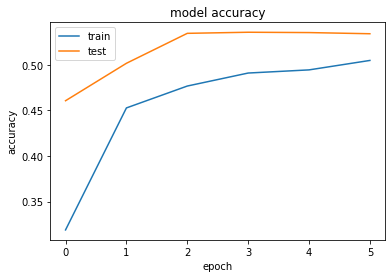

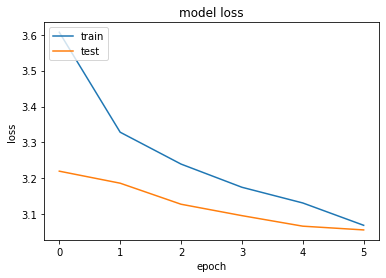

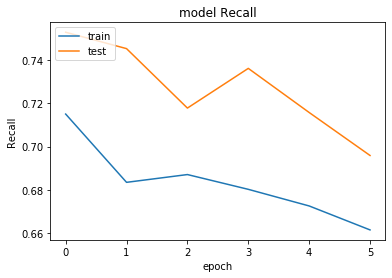

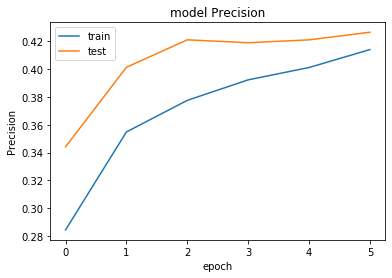

In [171]:
    
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
    
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['recall_9'])
plt.plot(history.history['val_recall_9'])

plt.title('model Recall')
plt.ylabel('Recall')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['precision_9'])
plt.plot(history.history['val_precision_9'])

plt.title('model Precision')
plt.ylabel('Precision')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [60]:
#cnn + word embedding


In [174]:
from keras.layers import Activation,Conv1D,MaxPooling1D,Flatten
model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

#model_cnn.add(MaxPooling1D())

model.add(Conv1D(320,2, activation='tanh'))
model.add(Conv1D(160,2))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling1D())
model.add(Dropout(0.6))


model.add(Conv1D(80,2, activation='tanh'))
model.add(Conv1D(40,2))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling1D())
model.add(Dropout(0.4))


model.add(Conv1D(20,2, activation='tanh'))
model.add(Conv1D(10,2))
model.add(LeakyReLU(alpha=0.1))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.4))
model.add(Dense(5, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc',metrics.Recall(),metrics.Precision()])
print (model.summary())

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 20, 100)           1375900   
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 19, 320)           64320     
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 18, 160)           102560    
_________________________________________________________________
leaky_re_lu_42 (LeakyReLU)   (None, 18, 160)           0         
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 9, 160)            0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 9, 160)            0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 8, 80)           

In [175]:
history = model.fit(X_train_tk, Y_train_oh, batch_size=80, epochs=6, verbose=1, validation_split=0.2,class_weight=class_weight)

Train on 99878 samples, validate on 24970 samples
Epoch 1/6
99878/99878 [==============================] - 70s 696us/step - loss: 3.5241 - acc: 0.4135 - recall_10: 0.6520 - precision_10: 0.3225 - val_loss: 3.1188 - val_acc: 0.4624 - val_recall_10: 0.6709 - val_precision_10: 0.3751
Epoch 2/6
99878/99878 [==============================] - 72s 719us/step - loss: 3.2758 - acc: 0.4563 - recall_10: 0.6145 - precision_10: 0.3809 - val_loss: 3.0557 - val_acc: 0.5115 - val_recall_10: 0.6960 - val_precision_10: 0.4271
Epoch 3/6
99878/99878 [==============================] - 74s 741us/step - loss: 3.2043 - acc: 0.4640 - recall_10: 0.5989 - precision_10: 0.3969 - val_loss: 3.0273 - val_acc: 0.5083 - val_recall_10: 0.6939 - val_precision_10: 0.4215
Epoch 4/6
99878/99878 [==============================] - 67s 674us/step - loss: 3.1490 - acc: 0.4657 - recall_10: 0.5995 - precision_10: 0.4041 - val_loss: 3.0521 - val_acc: 0.4924 - val_recall_10: 0.6946 - val_precision_10: 0.4245
Epoch 5/6
99878/99878 

In [177]:
pr = model.predict(X_test_tk)

In [178]:
cnf_matrix = metrics.confusion_matrix(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1))
print(cnf_matrix)

[[1152  120   63   81    0]
 [3079  853 1002  593    0]
 [2361 1783 8807 2688    0]
 [ 919  513 1245 4029    1]
 [ 142   77   72 1629    3]]


In [179]:
recall_score(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1),average='micro')

0.4755863129565552

In [180]:
mean_squared_error(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1))

1.2149173394848136

In [181]:
precision_score(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1),average='micro')

0.4755863129565552

In [182]:
accuracy_score(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1))

0.4755863129565552

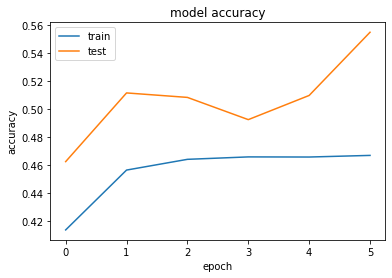

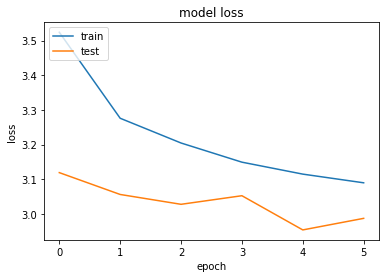

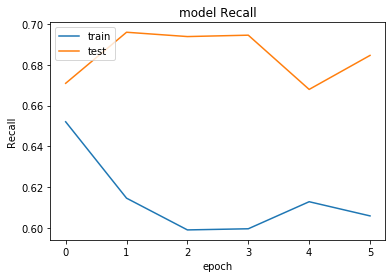

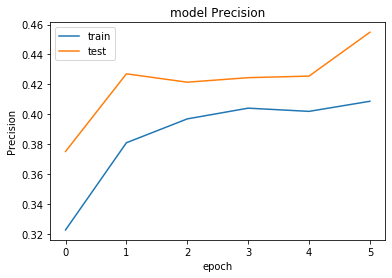

In [184]:
    
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
    
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['recall_10'])
plt.plot(history.history['val_recall_10'])

plt.title('model Recall')
plt.ylabel('Recall')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['precision_10'])
plt.plot(history.history['val_precision_10'])

plt.title('model Precision')
plt.ylabel('Precision')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [48]:
#lstm + word embedding

In [57]:
from keras.layers import Embedding,LSTM
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)


model.add(LSTM(320,return_sequences = True))
model.add(LSTM(160,return_sequences = True))
model.add(Dropout(0.6))
model.add(LSTM(80,return_sequences = True))
model.add(LSTM(40,return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(20,return_sequences = True))
model.add(LSTM(10,return_sequences = False))
model.add(Dropout(0.4))

model.add(Dense(5, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc',metrics.Recall(),metrics.Precision()])
print (model.summary())




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 100)           1361200   
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 320)           538880    
_________________________________________________________________
lstm_2 (LSTM)                (None, 20, 160)           307840    
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 160)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 20, 80)            77120     
_________________________________________________________________
lstm_4 (LSTM)                (None, 20, 40)            19360     
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 40)           

In [58]:
history = model.fit(X_train_tk, Y_train_oh, batch_size=80, epochs=6, verbose=1, validation_split=0.2,class_weight=class_weight)

Train on 52762 samples, validate on 13191 samples
Epoch 1/6
52762/52762 [==============================] - 366s 7ms/step - loss: 3.6228 - acc: 0.3686 - recall_1: 0.7319 - precision_1: 0.3064 - val_loss: 3.3218 - val_acc: 0.5306 - val_recall_1: 0.7948 - val_precision_1: 0.3590
Epoch 2/6
52762/52762 [==============================] - 311s 6ms/step - loss: 3.2903 - acc: 0.4570 - recall_1: 0.7487 - precision_1: 0.3513 - val_loss: 3.2242 - val_acc: 0.5081 - val_recall_1: 0.7832 - val_precision_1: 0.3742
Epoch 3/6
52762/52762 [==============================] - 301s 6ms/step - loss: 3.1505 - acc: 0.4783 - recall_1: 0.7425 - precision_1: 0.3768 - val_loss: 3.0773 - val_acc: 0.5070 - val_recall_1: 0.7597 - val_precision_1: 0.3987
Epoch 4/6
52762/52762 [==============================] - 304s 6ms/step - loss: 3.0623 - acc: 0.4868 - recall_1: 0.7288 - precision_1: 0.3880 - val_loss: 3.0112 - val_acc: 0.5041 - val_recall_1: 0.7474 - val_precision_1: 0.4237
Epoch 5/6
52762/52762 [===================

In [60]:
pr = model.predict(X_test_tk)

In [61]:
cnf_matrix = metrics.confusion_matrix(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1))
print(cnf_matrix)

[[ 608  105   26   40    0]
 [1474  692  494  276    0]
 [ 887 1518 4838  947    0]
 [ 237  279 1091 1963    0]
 [  21   33   77  883    0]]


In [62]:
recall_score(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1),average='micro')

0.49129722845533386

In [63]:
mean_squared_error(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1))

0.9593062041360907

In [64]:
precision_score(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1),average='micro')

0.49129722845533386

In [65]:
accuracy_score(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1))

0.49129722845533386

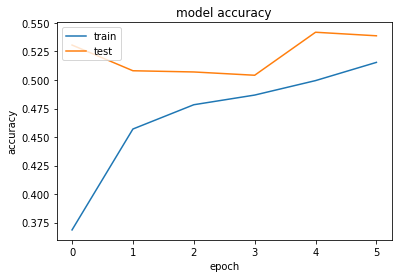

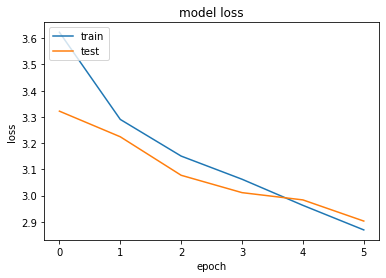

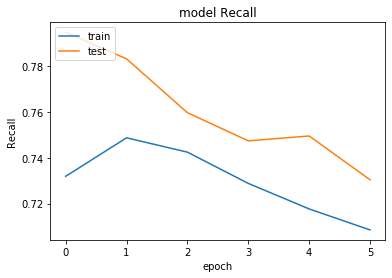

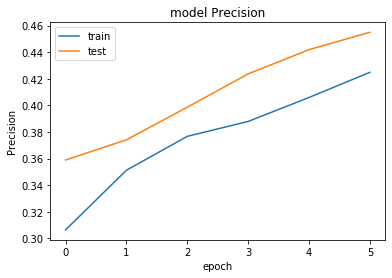

In [66]:
    
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
    
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['recall_1'])
plt.plot(history.history['val_recall_1'])

plt.title('model Recall')
plt.ylabel('Recall')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['precision_1'])
plt.plot(history.history['val_precision_1'])

plt.title('model Precision')
plt.ylabel('Precision')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [65]:
#tfidf + DNN

In [200]:
model = Sequential()

model.add(Dense(320,input_shape= (16694,), activation='tanh'))
model.add(Dense(16))
model.add(Dropout(0.6))
model.add(LeakyReLU(alpha=0.1))

model.add(Dense(80, activation='tanh'))
model.add(Dense(40))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.4))


model.add(Dense(20, activation='tanh'))
model.add(Dense(10))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.4))
model.add(Dense(5, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc',metrics.Recall(),metrics.Precision()])
print (model.summary())

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 320)               5342400   
_________________________________________________________________
dense_72 (Dense)             (None, 16)                5136      
_________________________________________________________________
dropout_52 (Dropout)         (None, 16)                0         
_________________________________________________________________
leaky_re_lu_51 (LeakyReLU)   (None, 16)                0         
_________________________________________________________________
dense_73 (Dense)             (None, 80)                1360      
_________________________________________________________________
dense_74 (Dense)             (None, 40)                3240      
_________________________________________________________________
leaky_re_lu_52 (LeakyReLU)   (None, 40)              

In [201]:
history = model.fit(X_train_tfidf, Y_train_oh, batch_size=80, epochs=6, verbose=1, validation_split=0.2,class_weight=class_weight)

Train on 99878 samples, validate on 24970 samples
Epoch 1/6
99878/99878 [==============================] - 241s 2ms/step - loss: 3.4778 - acc: 0.3646 - recall_12: 0.7161 - precision_12: 0.3115 - val_loss: 2.9629 - val_acc: 0.4767 - val_recall_12: 0.8152 - val_precision_12: 0.3530
Epoch 2/6
99878/99878 [==============================] - 214s 2ms/step - loss: 2.9821 - acc: 0.4882 - recall_12: 0.8037 - precision_12: 0.3767 - val_loss: 2.8331 - val_acc: 0.5405 - val_recall_12: 0.8021 - val_precision_12: 0.3954
Epoch 3/6
99878/99878 [==============================] - 224s 2ms/step - loss: 2.8332 - acc: 0.5219 - recall_12: 0.7961 - precision_12: 0.4058 - val_loss: 2.7985 - val_acc: 0.5529 - val_recall_12: 0.8064 - val_precision_12: 0.4218
Epoch 4/6
99878/99878 [==============================] - 232s 2ms/step - loss: 2.7562 - acc: 0.5242 - recall_12: 0.7814 - precision_12: 0.4179 - val_loss: 2.7971 - val_acc: 0.5660 - val_recall_12: 0.7949 - val_precision_12: 0.4245
Epoch 5/6
99878/99878 [===

In [203]:
pr = model.predict(X_test_tfidf)

In [204]:
cnf_matrix = metrics.confusion_matrix(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1))
print(cnf_matrix)

[[1181  122   77   36    0]
 [2673 1342 1207  305    0]
 [1700 3518 8374 2047    0]
 [ 193  403 2227 3884    0]
 [  14   15  160 1734    0]]


In [205]:
recall_score(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1),average='micro')

0.4735678585159554

In [206]:
mean_squared_error(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1))

0.8499295142893759

In [207]:
precision_score(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1),average='micro')

0.4735678585159554

In [208]:
accuracy_score(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1))

0.4735678585159554

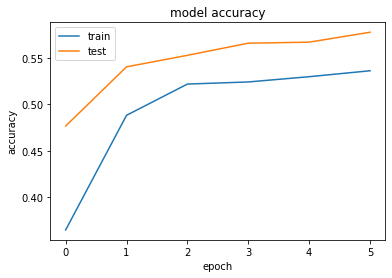

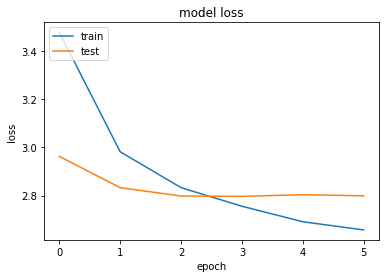

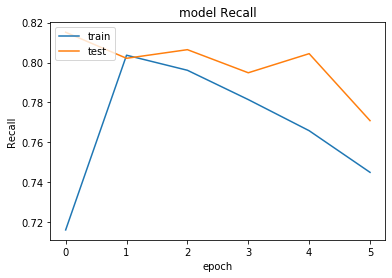

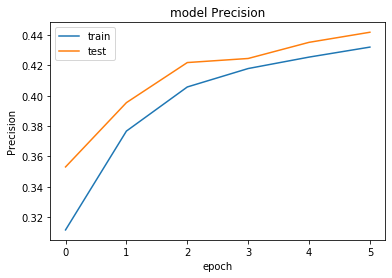

In [209]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
    
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['recall_12'])
plt.plot(history.history['val_recall_12'])

plt.title('model Recall')
plt.ylabel('Recall')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['precision_12'])
plt.plot(history.history['val_precision_12'])

plt.title('model Precision')
plt.ylabel('Precision')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [71]:
#bag of words + DNN

In [212]:
model = Sequential()

model.add(Dense(320,input_shape= (9632,), activation='tanh'))
model.add(Dense(160))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.6))


model.add(Dense(80, activation='tanh'))
model.add(Dense(40))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.4))

model.add(Dense(20, activation='tanh'))
model.add(Dense(10))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.4))

model.add(Dense(5, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc',metrics.Recall(),metrics.Precision()])
print (model.summary())

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 320)               3082560   
_________________________________________________________________
dense_86 (Dense)             (None, 160)               51360     
_________________________________________________________________
leaky_re_lu_57 (LeakyReLU)   (None, 160)               0         
_________________________________________________________________
dropout_58 (Dropout)         (None, 160)               0         
_________________________________________________________________
dense_87 (Dense)             (None, 80)                12880     
_________________________________________________________________
dense_88 (Dense)             (None, 40)                3240      
_________________________________________________________________
leaky_re_lu_58 (LeakyReLU)   (None, 40)              

In [213]:
history = model.fit(X_train_mybag, Y_train_oh, batch_size=80, epochs=6, verbose=1, validation_split=0.2,class_weight=class_weight)

Train on 99878 samples, validate on 24970 samples
Epoch 1/6
99878/99878 [==============================] - 137s 1ms/step - loss: 3.4195 - acc: 0.2757 - recall_13: 0.8356 - precision_13: 0.2879 - val_loss: 2.9349 - val_acc: 0.3181 - val_recall_13: 0.8259 - val_precision_13: 0.3417
Epoch 2/6
99878/99878 [==============================] - 147s 1ms/step - loss: 2.9208 - acc: 0.4479 - recall_13: 0.8208 - precision_13: 0.3707 - val_loss: 2.7681 - val_acc: 0.5224 - val_recall_13: 0.8342 - val_precision_13: 0.3957
Epoch 3/6
99878/99878 [==============================] - 157s 2ms/step - loss: 2.7502 - acc: 0.4987 - recall_13: 0.8015 - precision_13: 0.4167 - val_loss: 2.7082 - val_acc: 0.5125 - val_recall_13: 0.7804 - val_precision_13: 0.4149
Epoch 4/6
99878/99878 [==============================] - 168s 2ms/step - loss: 2.6440 - acc: 0.5192 - recall_13: 0.7568 - precision_13: 0.4441 - val_loss: 2.6679 - val_acc: 0.5577 - val_recall_13: 0.7618 - val_precision_13: 0.4496
Epoch 5/6
99878/99878 [===

In [214]:
pr = model.predict(X_test_mybag)

In [216]:
cnf_matrix = metrics.confusion_matrix(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1))
print(cnf_matrix)

[[1179  147   66   17    7]
 [2532 1421 1320  221   33]
 [1475 2202 9709 2113  140]
 [ 376  306 1803 3428  794]
 [  55   24   94  852  898]]


In [217]:
recall_score(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1),average='micro')

0.5329680891964629

In [218]:
mean_squared_error(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1))

0.8334294502114571

In [219]:
precision_score(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1),average='micro')

0.5329680891964629

In [220]:
accuracy_score(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1))

0.5329680891964629

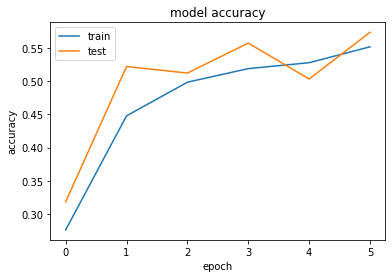

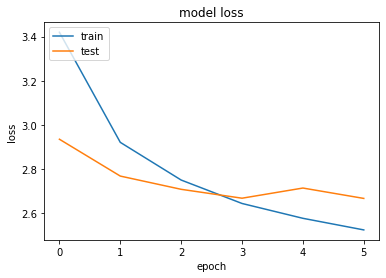

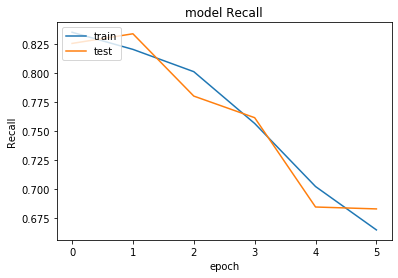

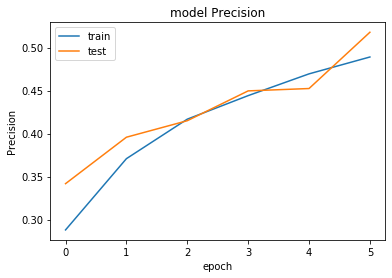

In [221]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
    
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['recall_13'])
plt.plot(history.history['val_recall_13'])

plt.title('model Recall')
plt.ylabel('Recall')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['precision_13'])
plt.plot(history.history['val_precision_13'])

plt.title('model Precision')
plt.ylabel('Precision')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()